In [1]:
test_path='C:/1_VISHAL/Titanic/titanic/test.csv'
train_path='C:/1_VISHAL/Titanic/titanic/train.csv'
gender_submission='C:/1_VISHAL/Titanic/titanic/gender_submission.csv'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
train_df=pd.read_csv(train_path)
test_df=pd.read_csv(test_path)
gender_submission_df=pd.read_csv(gender_submission)

In [4]:
print('train dataset:',train_df.shape)
print('test dataset:',test_df.shape)
print('gendersubmission dataset:',gender_submission_df.shape)

train dataset: (891, 12)
test dataset: (418, 11)
gendersubmission dataset: (418, 2)


In [5]:
survived_col=gender_submission_df.drop(['PassengerId'],axis=1)

In [6]:
test_combined=pd.concat([test_df,survived_col],axis=1)

In [7]:
test_combined.shape

(418, 12)

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
total_missing = train_df.isnull().sum().sort_values(ascending=False)
total_missing

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

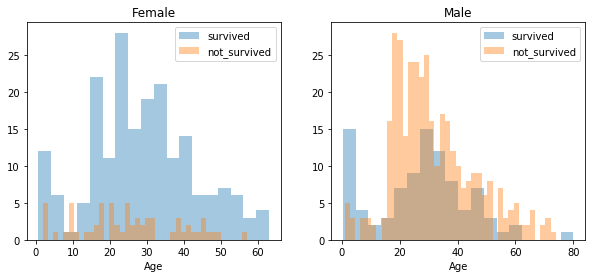

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(),
bins=18, label = 'survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(),
bins=40, label = 'not_survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(),
bins=18, label = 'survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(),
bins=40, label = 'not_survived', ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

C:\Users\visha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


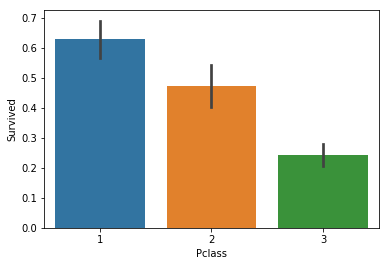

In [14]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

In [15]:
train_df = train_df.drop(['PassengerId'], axis=1)

In [17]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G":
7, "U": 8}
data = [train_df, test_df]
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x:
re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

In [18]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [19]:
data = [train_df, test_df]
for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std,size = is_null)
# fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [21]:
common_value = 'S'
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] =dataset['Embarked'].fillna(common_value)

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
Deck        891 non-null int32
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 69.7+ KB


In [23]:
data = [train_df, test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [24]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [25]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [26]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [27]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [28]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,0,22,1,0,7,0,8
1,1,1,1,38,1,0,71,1,3
2,1,3,1,26,0,0,7,0,8
3,1,1,1,35,1,0,53,0,3
4,0,3,0,35,0,0,8,0,8
5,0,3,0,34,0,0,8,2,8
6,0,1,0,54,0,0,51,0,5
7,0,3,0,2,3,1,21,0,8
8,1,3,1,27,0,2,11,0,8
9,1,2,1,14,1,0,30,1,8


In [47]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

In [31]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


79.8

In [40]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train,
Y_train) * 100, 2)
acc_random_forest

97.31

In [41]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train) 
Y_pred=decision_tree.predict(X_test) 
acc_decision_tree =round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.31

In [37]:
results = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Decision Tree'],
'Score': [acc_log,acc_random_forest, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
97.31,Random Forest
97.31,Decision Tree
79.80,Logistic Regression


In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=20)

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print('Accuracy of logistic regression is::',acc_log)
print('precision is',precision_score(y_test,Y_pred))
print('recall',recall_score(y_test,Y_pred))

Accuracy of logistic regression is:: 80.58
precision is 0.6767676767676768
recall 0.6836734693877551


C:\Users\visha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train,Y_train) * 100, 2)
print('Accuracy of Random Forest::',acc_random_forest)
print('precision is',precision_score(y_test,Y_prediction))
print('recall',recall_score(y_test,Y_prediction))

Accuracy of Random Forest:: 98.07
precision is 0.7010309278350515
recall 0.6938775510204082


In [51]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train) 
Y_pred_d=decision_tree.predict(X_test) 
acc_decision_tree =round(decision_tree.score(X_train, Y_train) * 100, 2)
print('Accuracy of decision is::',acc_decision_tree)
print('precision is',precision_score(y_test,Y_pred_d))
print('recall',recall_score(y_test,Y_pred_d))

Accuracy of decision is:: 98.07
precision is 0.7083333333333334
recall 0.6938775510204082
